<a href="https://colab.research.google.com/github/mlokendra/Machine_Learners/blob/main/project_sub_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [90]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [91]:
from google.colab import drive
drive.mount("/content/drive/")
%cd ./drive/My\ Drive/

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
[Errno 2] No such file or directory: './drive/My Drive/'
/content/drive/My Drive


In [172]:
df_new = pd.read_csv('Los_angels.csv', delimiter=',')
#df.dataframeNamee = 'dataset_5secondWindow%5B1%5D.csv'

In [173]:
df.head()

,Severity,Side,Wind_Direction,Wind_Speed(mph),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,2,0,0,4.6,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,1
1,3,0,0,4.6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1
2,3,0,0,4.6,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,1
3,3,0,0,4.6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1
4,3,0,1,9.2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1


In [94]:
df=df.replace(to_replace="Day",value="1")
df=df.replace(to_replace='Night',value="0")
df['Side'].nunique()

2

In [95]:
#convert true false to 0 and 1
print(len(df.axes[1]))
df[df.columns[6:19]]=df[df.columns[6:19]].astype(int)

23


In [96]:
type(df['Weather_Condition'].unique())

numpy.ndarray

In [97]:
#converting unique values in weather condition column

unique_vals = list(df['Weather_Condition'].unique())
df['Weather_Condition'].replace(to_replace=unique_vals,
           value= list(range(len(unique_vals))), inplace=True)



In [98]:
unique_vals = list(df['Wind_Direction'].unique())
df['Wind_Direction'].replace(to_replace=unique_vals,
           value= list(range(len(unique_vals))), inplace=True)
df

,Severity,Side,Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,2,R,0,4.6,NaN,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,1
1,3,R,0,4.6,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1
2,3,R,0,4.6,NaN,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,1
3,3,R,0,4.6,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1
4,3,R,1,9.2,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79165,2,R,2,8.0,0.0,17,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1
79166,3,R,18,0.0,0.0,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
79167,2,R,18,0.0,0.0,17,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1
79168,2,R,18,0.0,0.0,17,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,1


In [99]:
#
unique_vals = list(df['Side'].unique())
df['Side'].replace(to_replace=unique_vals,
           value= list(range(len(unique_vals))), inplace=True)
df

,Severity,Side,Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,2,0,0,4.6,NaN,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,1
1,3,0,0,4.6,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1
2,3,0,0,4.6,NaN,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,1
3,3,0,0,4.6,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1
4,3,0,1,9.2,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79165,2,0,2,8.0,0.0,17,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1
79166,3,0,18,0.0,0.0,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
79167,2,0,18,0.0,0.0,17,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1
79168,2,0,18,0.0,0.0,17,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,1


In [100]:
df = df.drop(columns=['Precipitation(in)'])

In [101]:
df

,Severity,Side,Wind_Direction,Wind_Speed(mph),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,2,0,0,4.6,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,1
1,3,0,0,4.6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1
2,3,0,0,4.6,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,1
3,3,0,0,4.6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1
4,3,0,1,9.2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79165,2,0,2,8.0,17,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1
79166,3,0,18,0.0,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
79167,2,0,18,0.0,17,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1
79168,2,0,18,0.0,17,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,1


In [102]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)
clean_dataset(df)

,Severity,Side,Wind_Direction,Wind_Speed(mph),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,2.0,0.0,0.0,4.6,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
1,3.0,0.0,0.0,4.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
2,3.0,0.0,0.0,4.6,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
3,3.0,0.0,0.0,4.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
4,3.0,0.0,1.0,9.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79165,2.0,0.0,2.0,8.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
79166,3.0,0.0,18.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
79167,2.0,0.0,18.0,0.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
79168,2.0,0.0,18.0,0.0,17.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0


# DATA SPLITING INTO TRANING AND TESTING

In [229]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
X = df.drop(['Severity'],axis=1).to_numpy()
X=np.vstack(X[:, :]).astype(np.float)
y = df.Severity

# Separação de datasets para treino e teste:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

# Building ANN As a Classifcation

In [220]:

from keras.models import Sequential
from keras.layers import Dense
from keras.layers.normalization import BatchNormalization
from keras import backend
import keras
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 

In [221]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(y)
print(integer_encoded)
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
y=np.array(onehot_encoded)

[1 2 2 ... 1 1 1]


In [178]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(32, kernel_initializer='normal',input_dim = 21, activation='relu'))
from keras.utils.vis_utils import plot_model
# The Hidden Layers :
NN_model.add(Dense(64, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(128, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
#NN_model.add(BatchNormalization())
# The Output Layer :
NN_model.add(Dense(4, kernel_initializer='normal',activation='softmax'))

# Compile the network :
NN_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
NN_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 32)                704       
_________________________________________________________________
dense_16 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_17 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_18 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_19 (Dense)             (None, 4)                 1028      
Total params: 45,188
Trainable params: 45,188
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = NN_model.fit(X_train,y_train, epochs=50, batch_size=32, validation_split = 0.3)

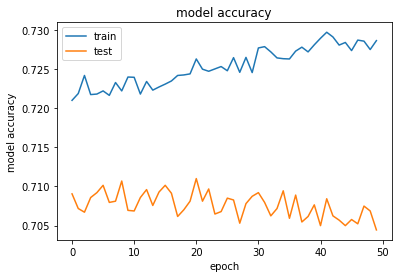

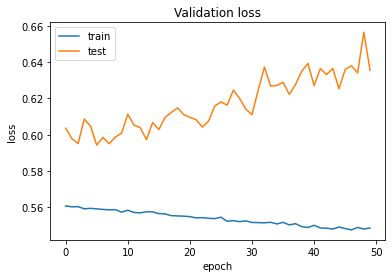

In [182]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
X_train.shape

In [184]:
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score

In [191]:
from sklearn import svm
clf = svm.SVC(decision_function_shape='ovo')
clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [230]:
 predicted = NN_model.predict(X_test)

In [231]:
np.argmax(predicted, axis=1)

array([1, 2, 2, ..., 1, 1, 1])

In [232]:
from sklearn import metrics
metrics.accuracy_score(y_test, np.argmax(predicted, axis=1))

0.08693817261025533

In [233]:
metrics.precision_score(y_test, np.argmax(predicted, axis=1),average=None)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([8.95335303e-05, 4.05449770e-01, 0.00000000e+00, 0.00000000e+00])

In [234]:
metrics.recall_score(y_test, np.argmax(predicted, axis=1),average=None)

array([1.        , 0.13102058, 0.        , 0.        ])

In [235]:
metrics.f1_score(y_test, np.argmax(predicted, axis=1),average=None)

array([1.79051030e-04, 1.98043618e-01, 0.00000000e+00, 0.00000000e+00])

In [ ]:
metrics.confusion_matrix(y_test, predicted)

array([[   0,    1,    0,    0],
       [   0, 9042,  384,    0],
       [   0, 4040,  625,    0],
       [   0,  115,   10,    0]])

Decision Tree 

In [204]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [205]:
 predicted = clf.predict(X_test)

In [206]:
from sklearn import metrics
metrics.accuracy_score(y_test, predicted)

0.6971935007385525

In [ ]:
metrics.confusion_matrix(y_test, predicted)

array([[   0,    1,    0,    0],
       [   0, 8332, 1079,   15],
       [   0, 3157, 1504,    4],
       [   0,   99,   25,    1]])

gradient boosting classifier

In [210]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(random_state=0)
clf.fit(X_train, y_train)
predicted=clf.predict(X_test)
clf.score(X_test, y_test)

0.7109094745726947

In [ ]:
metrics.confusion_matrix(y_test, predicted)

array([[   0,    0,    1,    0],
       [   0, 8438,  988,    0],
       [   0, 3076, 1589,    0],
       [   0,   98,   27,    0]])

In [ ]:
import seaborn as sns
sns.pairplot(df, hue="Severity", size=3)

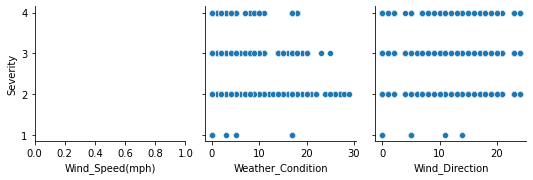

In [ ]:
sns.pairplot(
    df,
    x_vars=["Wind_Speed(mph)", "Weather_Condition", "Wind_Direction"],
    y_vars=["Severity"],
)

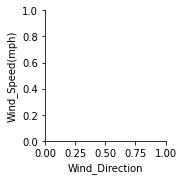

In [ ]:
sns.pairplot(
    df.drop(['Severity'],axis=1),
    y_vars=["Wind_Speed(mph)"],
    x_vars=["Wind_Direction"],
)

In [ ]:
from pandas.tools.plotting import radviz
radviz(df, "Species")

ModuleNotFoundError: ignored

In [ ]:
!pip install pandas.tools

ERROR: Could not find a version that satisfies the requirement pandas.tools (from versions: none)
ERROR: No matching distribution found for pandas.tools


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/misc.py:80: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/misc.py:80: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/misc.py:80: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/misc.py:80: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/usr/local/lib/python3.6/dist-packages/pandas/plotti

LinAlgError: ignored

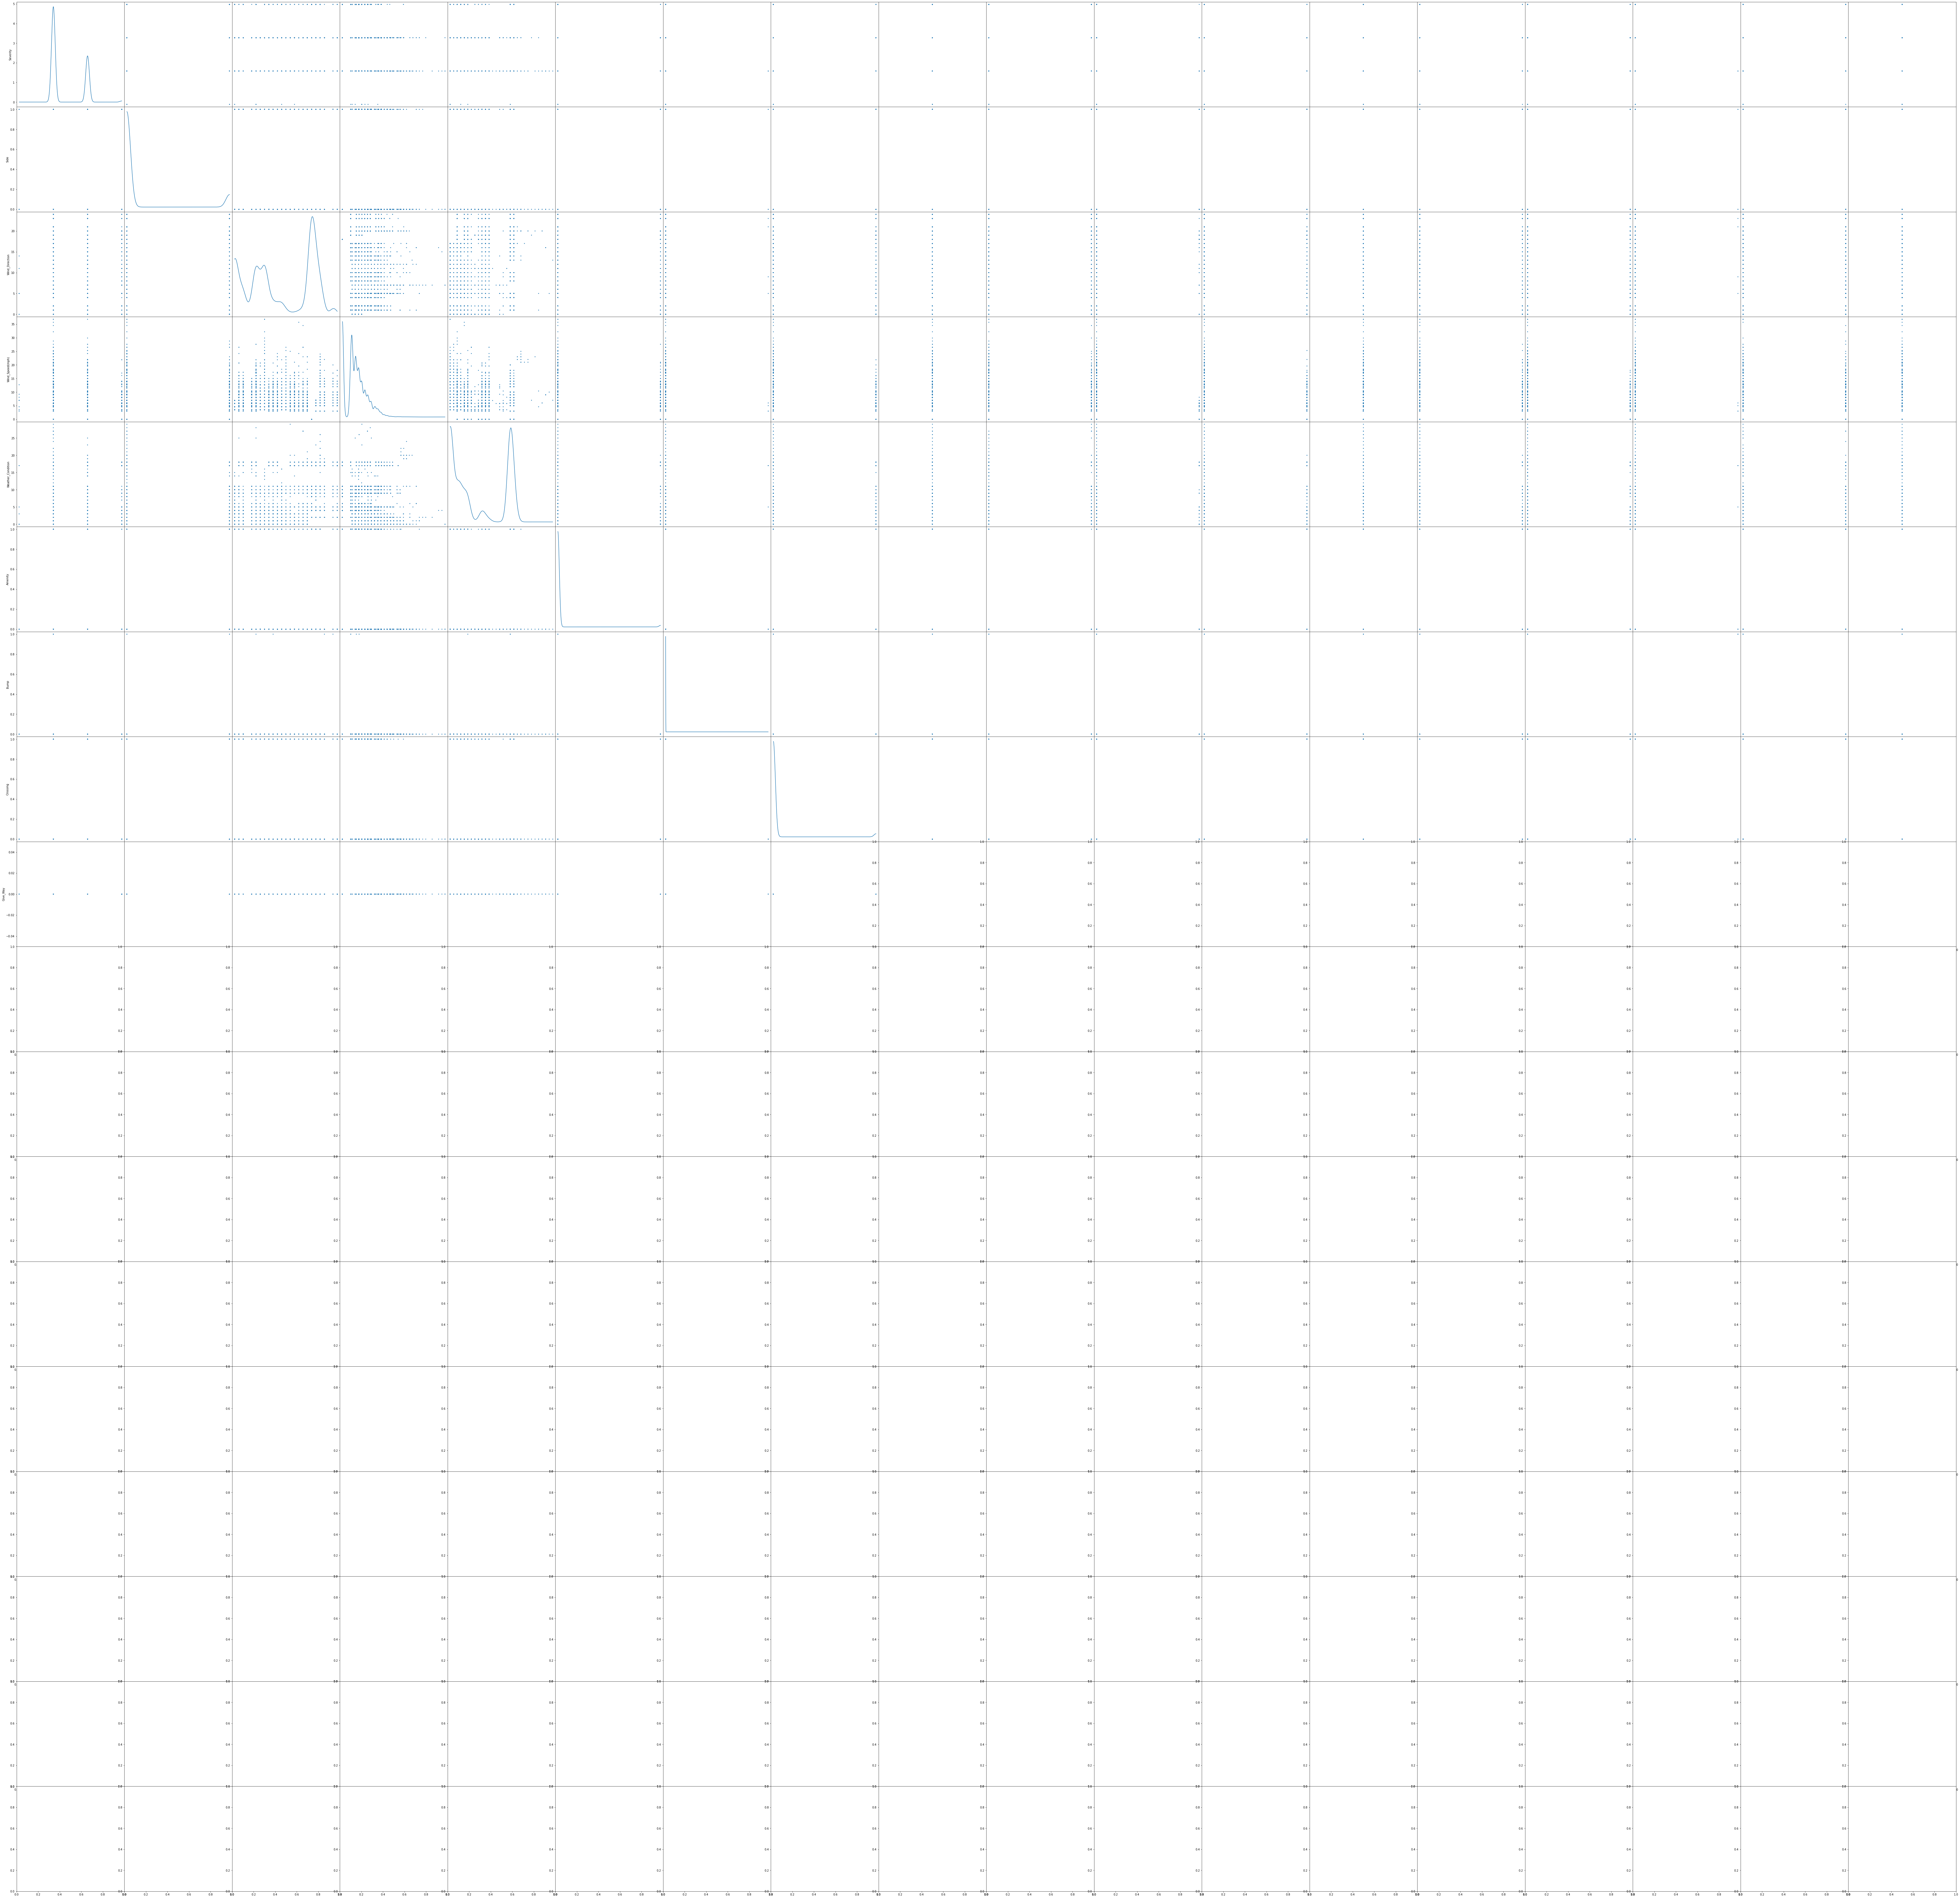

In [116]:
scatterplot_matrix  = pd.plotting.scatter_matrix(df, alpha=1.0, figsize=(125, 125), diagonal='kde')
corr = df_new.corr().as_matrix()
for i,j in zip (*plt.np.triu_indices_from(scatterplot_matrix, k=1)):
    scatterplot_matrix[i,j].annotate('%.4f' %corr[i,j], (0.5,0.5), xycoords='axes fraction', ha='center', va='center')
plt.tight_layout()
plt.show()
import seaborn as sns
corr = df_new.corr() 
sns.heatmap(corr, annot=True, linewidths=3,cmap='Blues')

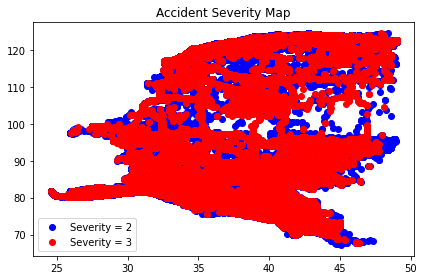

In [129]:
df2 = df_new.loc[df_new["Severity"] == 1]
df3 = df_new.loc[df_new["Severity"] == 3]

xx2 , yy2 = df2["Start_Lat"] , -df2["Start_Lng"]
xx3 , yy3 = df3["Start_Lat"] , -df3["Start_Lng"]

pts2 = plt.scatter(xx2,yy2,color = 'b' )
pts3 = plt.scatter(xx3,yy3,color = 'r' )
plt.legend((pts2, pts3), ('Severity = 2', 'Severity = 3'),loc='lower left')
plt.title("Accident Severity Map")
plt.tight_layout()

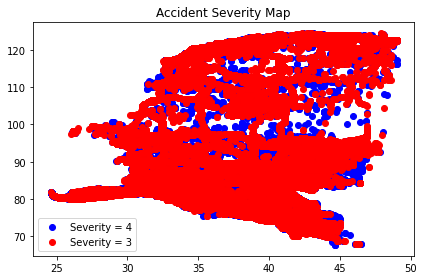

In [132]:
df2 = df_new.loc[df_new["Severity"] == 4]
df3 = df_new.loc[df_new["Severity"] == 3]

xx2 , yy2 = df2["Start_Lat"] , -df2["Start_Lng"]
xx3 , yy3 = df3["Start_Lat"] , -df3["Start_Lng"]

pts2 = plt.scatter(xx2,yy2,color = 'b' )
pts3 = plt.scatter(xx3,yy3,color = 'r' )
plt.legend((pts2, pts3), ('Severity = 4', 'Severity = 3'),loc='lower left')
plt.title("Accident Severity Map")
plt.tight_layout()

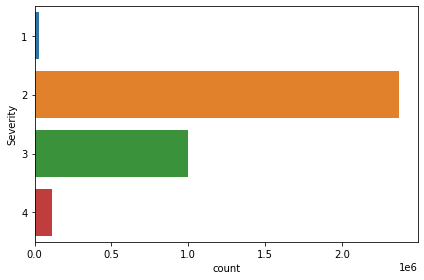

In [133]:
sns.countplot(y = "Severity" , data = df_new )
plt.tight_layout()

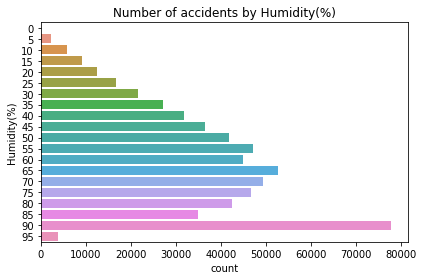

In [167]:
sns.countplot(y = "Weather_Condition" , data = df_new,order =['','','',] )
plt.title("Number of accidents by Weather_Condition")
plt.tight_layout()

In [169]:
 df_new
 

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.010,Right lane blocked due to accident on I-70 Eas...,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.010,Accident on Brice Rd at Tussing Rd. Expect del...,2584.0,Brice Rd,L,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.010,Accident on OH-32 State Route 32 Westbound at ...,NaN,State Route 32,R,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.010,Accident on I-75 Southbound at Exits 52 52B US...,NaN,I-75 S,R,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,2016-02-08 07:38:00,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.010,Accident on McEwen Rd at OH-725 Miamisburg Cen...,NaN,Miamisburg Centerville Rd,R,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,2016-02-08 07:53:00,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3513735,A-3513776,Bing,NaN,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.99888,-117.37094,0.543,At Market St - Accident.,NaN,Pomona Fwy E,R,Riverside,Riverside,CA,92501,US,US/Pacific,KRAL,2019-08-23 17:53:00,86.0,86.0,40.0,28.92,10.0,W,13.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
3513736,A-3513777,Bing,NaN,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.76555,-117.15363,0.338,At Camino Del Rio/Mission Center Rd - Accident.,NaN,I-8 W,R,San Diego,San Diego,CA,92108,US,US/Pacific,KMYF,2019-08-23 18:53:00,70.0,70.0,73.0,29.39,10.0,SW,6.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
3513737,A-3513778,Bing,NaN,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.77740,-117.85727,0.561,At Glassell St/Grand Ave - Accident. in the ri...,NaN,Garden Grove Fwy,R,Orange,Orange,CA,92866,US,US/Pacific,KSNA,2019-08-23 18:53:00,73.0,73.0,64.0,29.74,10.0,SSW,10.0,0.00,Partly Cloudy,False,False,False,False,True,False,False,False,False,False,False,False,False,Day,Day,Day,Day
3513738,A-3513779,Bing,NaN,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.98311,-118.39565,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,NaN,San Diego Fwy S,R,Culver City,Los Angeles

In [168]:
import datetime as dt

In [161]:
min(df_new["Temperature(F)"])

-89.0